In [176]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import secrets
import plotly as plotly
import plotly.express as px
from tqdm import tqdm
import plotly.graph_objects as go
pd.set_option('plotting.backend', 'matplotlib')
plotly.offline.init_notebook_mode()
#warnings.simplefilter(action='ignore', category=FutureWarnin

import plotly.io as pio
plotly_template = pio.templates["plotly_dark"]
plt.style.use('dark_background')





<h1>PORTFOLIO ONLY IWDA</h1>


In [177]:
TICKERS=["IWDA.AS","^GSPC","AAPL"]
NUMBER_OF_SIMULATIONS=10000
STARTING_CAPITAL = 10000
YEARS_OF_SIMULATION=30

In [178]:
YEARS_OF_SIMULATION=YEARS_OF_SIMULATION+1
Market_Days=253

df_Tickers={x: yf.download(x)["Adj Close"].pct_change(1).dropna() for x in TICKERS}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [179]:
df_simulations={x: np.zeros((YEARS_OF_SIMULATION,NUMBER_OF_SIMULATIONS)) for x in TICKERS}
for TICKER in TICKERS:
    df_local=df_simulations[TICKER]
    df_local[0, :] = STARTING_CAPITAL
    df_simulations[TICKER]=df_local
    for x in tqdm(range(0,NUMBER_OF_SIMULATIONS)):
        _=np.array((df_Tickers[TICKER].iloc[:]))
        for i in range(1,YEARS_OF_SIMULATION):
            annual_change=1
            sample=np.random.choice(_,Market_Days)+1
            annual_change=np.prod(sample)
            df_simulations[TICKER][i,x]=annual_change*df_simulations[TICKER][i-1,x]
df_simulations={x: pd.DataFrame(df_simulations[x]) for x in TICKERS}
df_simulations_1=  df_simulations



100%|██████████| 10000/10000 [00:07<00:00, 1284.68it/s]


In [180]:
df_simulations[TICKER]

0              1             2              3              4     \
0    10000.000000   10000.000000  1.000000e+04   10000.000000   10000.000000   
1    30800.771166    9028.268382  6.514583e+03   11127.669745    8780.025005   
2    27355.671888   11527.995221  6.274640e+03   27805.129390   16480.652019   
3    39335.958322    7329.243925  5.072513e+03   28599.289232   15429.960552   
4    56832.887773    9031.655083  9.545030e+03   12676.290216   22557.430133   
5   156410.356308    9686.932482  8.119735e+03   53998.670865   25259.899080   
6   160238.725876   11207.021051  1.736692e+04   67274.803738   53917.576307   
7    68365.666114   19215.136029  2.720715e+04   70805.220271   32913.567682   
8    62966.183716   35389.989946  3.263268e+04   65605.094514   79657.344918   
9    53458.055671   43941.488785  3.723771e+04  132412.632788   81656.264543   
10   54940.237955   88130.433968  4.726809e+04  152012.659970   81490.033581   
11   56718.363566  137321.575694  3.614870e+04  107630.252187  124163.168319   
12  112411.379601  151984.235232  4.938667e+04   64907.842670  150882.910912   
13  166354.158721  152771.929874  5.613116e+04   61328.492193  311932.234588   
14  215096.398179  237148.982532  6.648870e+04   44291.736080  101773.303509   
15  289106.963243  286936.032302  1.558056e+05   90619.708026   71701.167109   
16  390395.350106  312043.050960  8.727550e+04   92872.025728   46468.747198   
17  628589.226814  214711.256136  1.693400e+05   90670.249890   56396.518876   
18  765959.876402  356159.532811  2.346139e+05   56420.852950   58249.447486   
19  810427.455495  249899.718585  1.952324e+05  122665.812040   70101.565367   
20  912553.524775  139076.696283  2.559283e+05  145872.108675   79834.301169   
21  987687.712695  109372.775646  4.603961e+05  257769.916642   50591.606998   
22  782028.564753   77943.718042  9.113337e+05  213181.993306   52301.613653   
23  422091.403904  120358.117603  1.672992e+06  186584.671155   56524.131878   
24  328977.078635  188658.783413  1.023140e+06  277530.568155   50989.931406   
25  746410.517813  112346.633641  1.478504e+06  233895.237977   61103.245737   
26  563140.333981  163896.470720  1.783452e+06  308985.810677   49572.759287   
27  400995.141629  241171.846802  2.842920e+06  495171.137863   58906.439718   
28  307702.072373  328626.373541  3.260689e+06  214692.986742   63895.049739   
29  290531.413299  417612.508704  5.497103e+06  199181.778586  123346.916989   
30  537507.028528  499029.881069  1.279289e+07  199838.037390   83370.370951   

             5             6              7             8             9     \
0    10000.000000  1.000000e+04   10000.000000  1.000000e+04  1.000000e+04   
1     4716.562645  7.135183e+03    5739.342471  1.195249e+04  5.512963e+03   
2     7137.352580  1.034505e+04    5590.719587  1.431268e+04  9.311466e+03   
3    16810.134024  1.035215e+04    2745.097613  3.298503e+04  1.132859e+04   
4    11497.983467  1.211528e+04    3395.191725  5.774346e+04  1.002040e+04   
5     7725.460441  1.716074e+04    2382.012472  8.327736e+04  6.208769e+03   
6     4570.708494  2.608470e+04    2281.500118  1.517287e+05  7.124602e+03   
7    15026.052043  2.124675e+04    2840.389136  2.058206e+05  4.978955e+03   
8    16219.286849  1.663932e+04    3828.267620  1.568399e+05  4.345815e+03   
9    10603.316515  2.134368e+04    6360.387041  2.755049e+05  6.224713e+03   
10   12708.264394  3.853541e+04    5512.296902  3.809742e+05  9.862855e+03   
11   17934.037784  7.833320e+04    7393.954958  4.791362e+05  2.374685e+04   
12   27443.487640  7.011537e+04    8543.970806  4.678532e+05  4.811888e+04   
13   31763.937043  8.835303e+04    7902.392737  9.326885e+05  6.447102e+04   
14   28156.825633  1.106252e+05    7802.384981  9.192267e+05  5.082459e+04   
15   46660.672510  2.454721e+05   13335.233631  2.200057e+06  8.213270e+04   
16   48331.252402  3.113001e+05   22329.373492  2.535361e+06  1.465243e+05   
17   45944.817486  7.025769e+05   19870.935259  

In [181]:
quantile={x: list(df_simulations[x].iloc[YEARS_OF_SIMULATION-1].quantile([0.1,0.9])) for x in TICKERS}
print(quantile)
df_simulations_purged={x: 40 for x in TICKERS}
print(df_simulations_purged)
for TICKER in TICKERS:
    df_local=df_simulations[TICKER]
    df_simulations_purged[TICKER]=df_local[df_local.columns[ df_local.max() < quantile[TICKER][1]]]
    df_simulations_purged[TICKER]=df_simulations_purged[TICKER][df_simulations_purged[TICKER].columns[ df_simulations_purged[TICKER].max() > quantile[TICKER][0]]]


{'IWDA.AS': [83334.02281150868, 731268.5473367105], '^GSPC': [15207.728997575834, 218154.3869965602], 'AAPL': [85287.40372581, 49847432.67781464]}
{'IWDA.AS': 40, '^GSPC': 40, 'AAPL': 40}


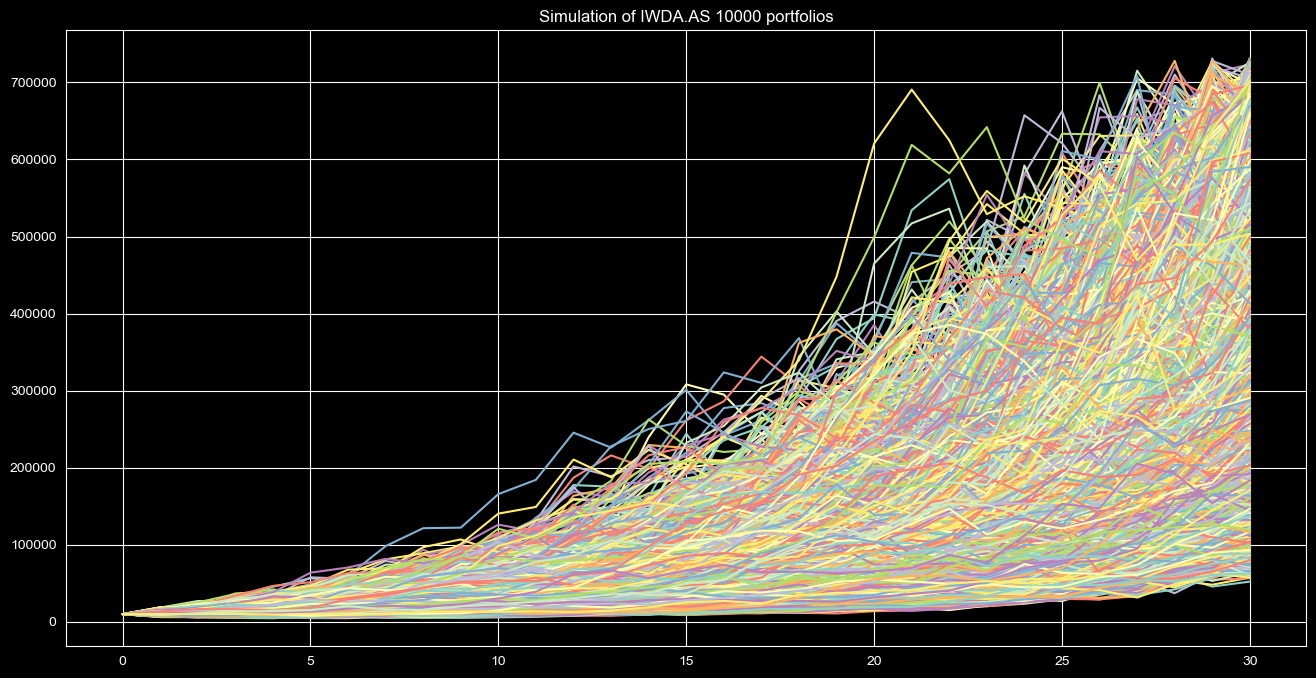

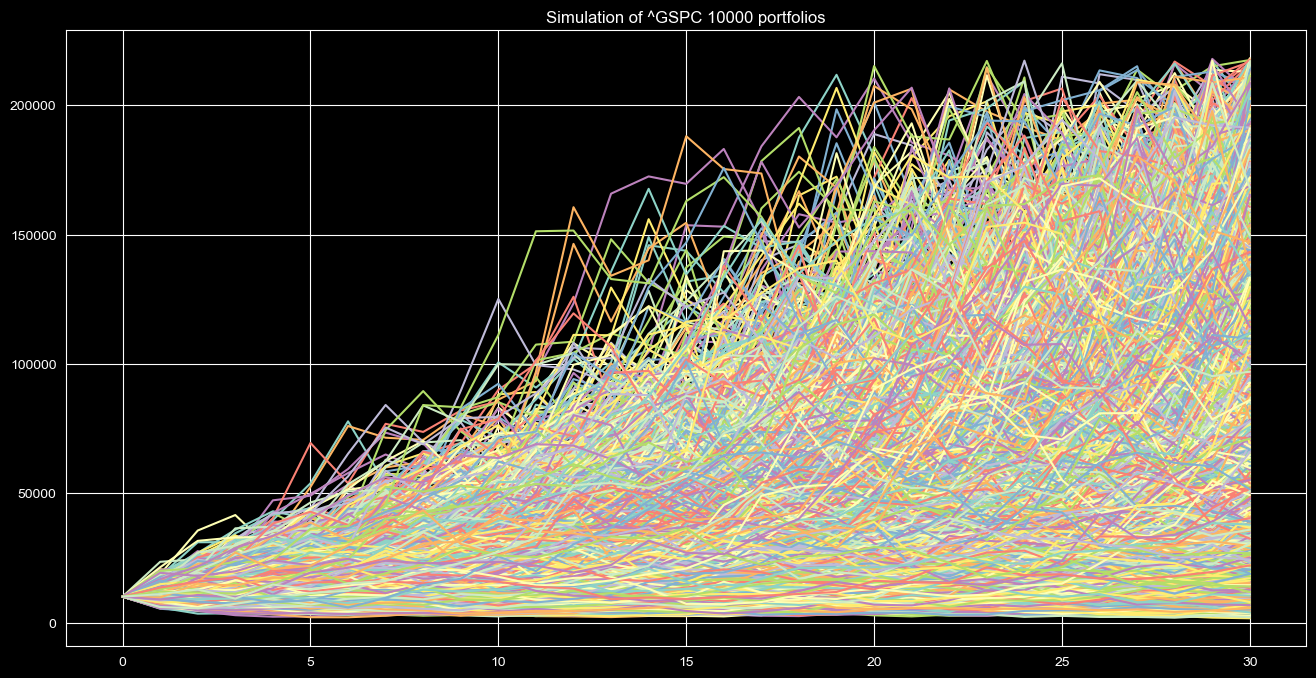

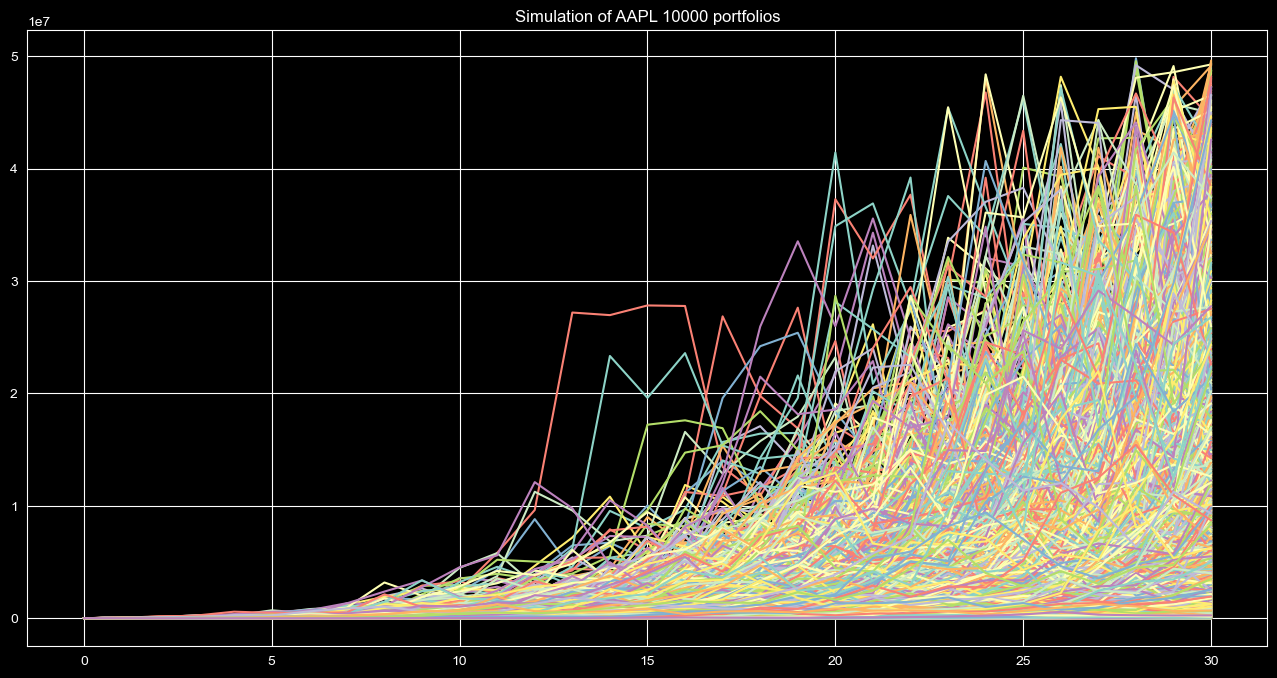

In [182]:
for TICKER in TICKERS:
    df_simulations_purged[TICKER].plot(figsize=(16,8), title=f"Simulation of {TICKER} {NUMBER_OF_SIMULATIONS} portfolios", legend=False)

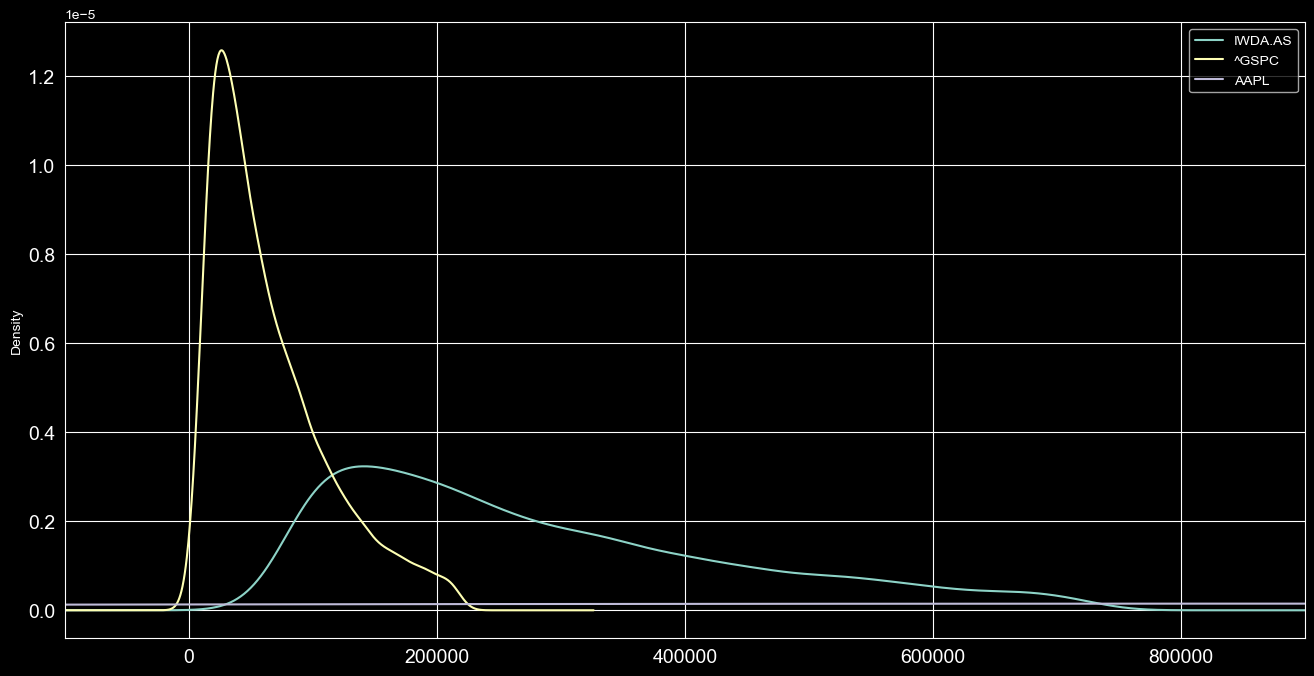

In [183]:
for TICKER in TICKERS:
    df_simulations_purged[TICKER].iloc[YEARS_OF_SIMULATION-1].plot.density(figsize=(16,8),fontsize=14, xlim=(-100000,900000), label=TICKER , legend= True)

In [184]:
df_statistics= {x: 0 for x in TICKERS}
for TICKER in TICKERS:
    top_25 =[]
    low_25 =[]
    median=[]
    for i in range(0,YEARS_OF_SIMULATION):
        top_25.append(df_simulations[TICKER].iloc[i].quantile(0.75))
        low_25.append(df_simulations[TICKER].iloc[i].quantile(0.25))
        median.append(df_simulations[TICKER].iloc[i].median())
    columns=["top 25%","median","bottom 25%"]
    df_statistics[TICKER]=pd.DataFrame(list(zip(top_25,median,low_25)),columns=columns)

In [185]:
#ax= df_statistics.plot(legend=None,logy=False,fontsize=20,figsize=(25,15),linewidth=4,color="black",title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios")
pd.set_option('plotting.backend', 'plotly')
for TICKER in TICKERS:
    fig = df_statistics[TICKER].plot(width=1600, height=800,title=f"Simulation of {NUMBER_OF_SIMULATIONS} {TICKER} portfolios",labels= {"index": "Years ", "value":"Total Capital"} ,template='plotly_dark')
    fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(df_statistics[TICKER]["top 25%"]),fill='tonexty',mode='lines', line_color='blue' , fillcolor ="red", showlegend=False, hoverinfo="skip"))    
    fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(df_statistics[TICKER]["median"]),fill='tonexty',mode='lines', line_color='orange', fillcolor="green", showlegend=False, hoverinfo="skip"))
    fig.show()

In [186]:
df_simulations_at_profit={x:0 for x in TICKERS}
for TICKER in TICKERS:
    ls_simulations_at_profit=[]
    for i in range(YEARS_OF_SIMULATION):
        c=len([1 for i in list(df_simulations[TICKER].iloc[i])if i > STARTING_CAPITAL])
        ls_simulations_at_profit.append(c/NUMBER_OF_SIMULATIONS*100)
    pd.set_option('plotting.backend', 'plotly')
    df_simulations_at_profit[TICKER] = pd.DataFrame(ls_simulations_at_profit,columns=["Profit %"])
    fig=df_simulations_at_profit[TICKER].plot(title=f"Minimum investment horizon of {TICKER}", labels= {"index": "Period length in years", "value":"Chance to be in profit"},template='plotly_dark')
    fig.show()
    
    
    

In [187]:
!jupyter nbconvert --to html Portfolio1.ipynb --HTMLExporter.theme=dark

[NbConvertApp] Converting notebook Portfolio1.ipynb to html
[NbConvertApp] Writing 4002040 bytes to Portfolio1.html
